In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
import numpy as np
from sklearn.cluster import KMeans

# 3.1 Explore the data

## 3.1.1 Load data from my own google driver
You can visit the code, output and the original data from:https://drive.google.com/drive/folders/18vlAyyRiEKBq9TJ0_HrASgO9WoXN_NJo?usp=sharing

The basic information of the dataset shown as follow 

In [2]:
# Read the dataset
data = pd.read_csv('F:/UZH/semester2/spatial_analysis2/assignment1/dc-isc-lu-data.csv')
print('check the colum the dataset has',data.columns)

check the colum the dataset has Index(['id', 'parcel_name', 'label', 'tw_0', 'tw_1', 'tw_2', 'tw_3', 'tw_4',
       'tw_5', 'tw_6',
       ...
       'entropy_158', 'entropy_159', 'entropy_160', 'entropy_161',
       'entropy_162', 'entropy_163', 'entropy_164', 'entropy_165',
       'entropy_166', 'entropy_167'],
      dtype='object', length=507)


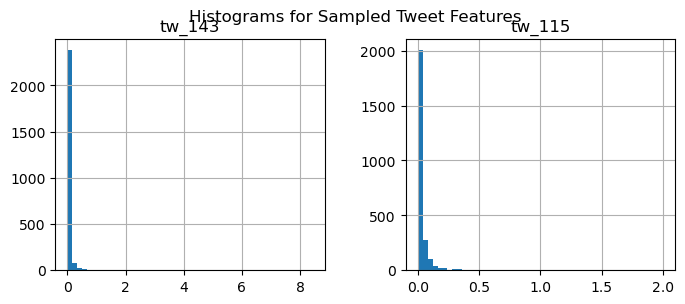

            tw_143       tw_115
count  2520.000000  2520.000000
mean      0.040949     0.030423
std       0.223525     0.125187
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max       8.428571     2.000000


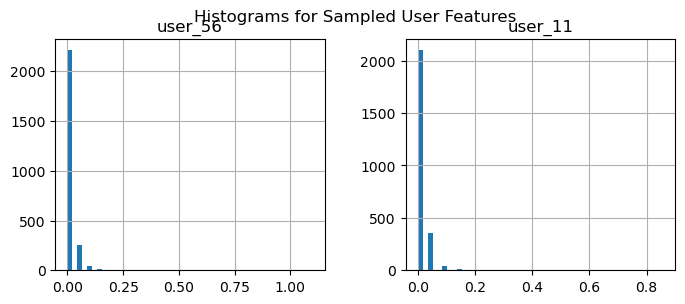

           user_56      user_11
count  2520.000000  2520.000000
mean      0.008313     0.010525
std       0.033091     0.032947
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max       1.100000     0.857143


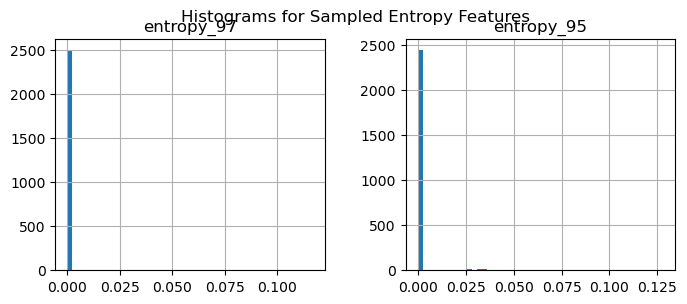

        entropy_97   entropy_95
count  2520.000000  2520.000000
mean      0.000370     0.001091
std       0.004384     0.006719
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max       0.116879     0.127928


In [3]:
# Define a function to summarize and plot a group of features
def summarize_plot_features(feature_group, group_name):
    # Sample 4 features from the group for plotting
    sampled_features = feature_group.sample(2, axis=1)
    # Summarize the features
    summary = sampled_features.describe()
    # Plot histograms for the sampled features
    sampled_features.hist(bins=50, figsize=(8, 3))
    plt.suptitle(f'Histograms for Sampled {group_name} Features')
    plt.show()
    return summary

# Group features by type
tweet_features = data.filter(regex='^tw_')
user_features = data.filter(regex='^user_')
entropy_features = data.filter(regex='^entropy_')

# Summarize and plot tweet features
tweet_summary = summarize_plot_features(tweet_features, 'Tweet')
print(tweet_summary)
# Summarize and plot user features
user_summary = summarize_plot_features(user_features, 'User')
print(user_summary)
# Summarize and plot entropy features
entropy_summary = summarize_plot_features(entropy_features, 'Entropy')
print(entropy_summary)

## 3.1.2 Residential and Non-Residential comparision

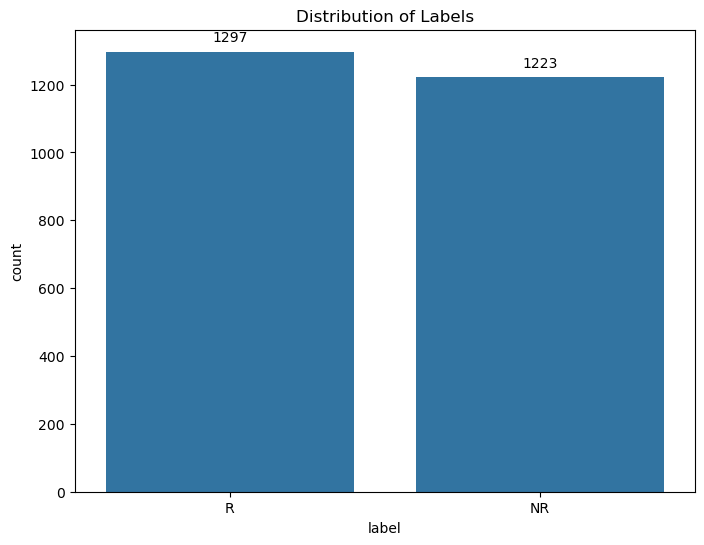

In [4]:
# Assume 'data' is your DataFrame and it has been loaded properly
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')

# Annotate the number of observations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The bar chart illustrates the distribution of labels between Residential (R) and Non-Residential (NR) areas. There are 1,297 instances labeled as Residential and 1,223 as Non-Residential, which indicates a relatively balanced distribution between the two types of land use.

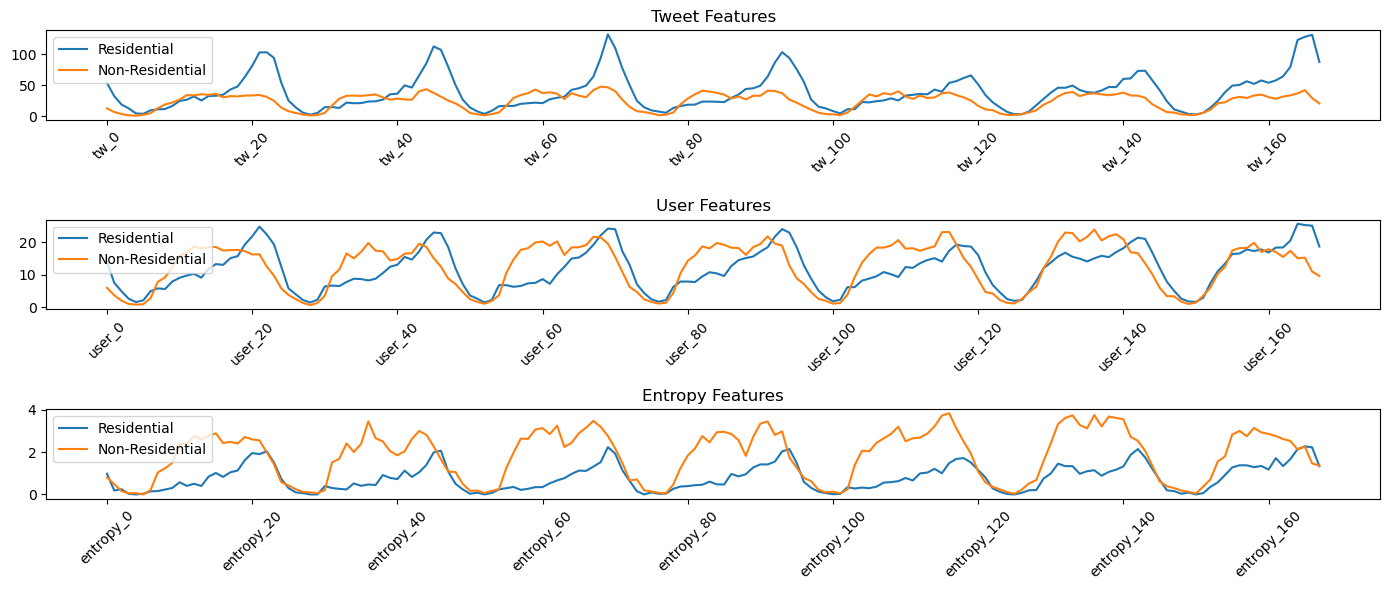

In [5]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# First, separate the features into categories based on their prefixes
tweet_features = data.filter(regex='^tw_')
user_features = data.filter(regex='^user_')
entropy_features = data.filter(regex='^entropy_')
labels = data['label']

# Group by the label to calculate the sum for R and NR areas
sum_tweets_R = tweet_features[labels == 'R'].sum()
sum_tweets_NR = tweet_features[labels == 'NR'].sum()
sum_users_R = user_features[labels == 'R'].sum()
sum_users_NR = user_features[labels == 'NR'].sum()
sum_entropy_R = entropy_features[labels == 'R'].sum()
sum_entropy_NR = entropy_features[labels == 'NR'].sum()

# Now create line plots for each category
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.plot(sum_tweets_R.index, sum_tweets_R.values, label='Residential')
plt.plot(sum_tweets_NR.index, sum_tweets_NR.values, label='Non-Residential')
plt.title('Tweet Features')
plt.legend()
plt.xticks(ticks=range(0, len(tweet_features.columns), 20), 
           labels=tweet_features.columns[::20], 
           rotation=45)

plt.subplot(3, 1, 2)
plt.plot(sum_users_R.index, sum_users_R.values, label='Residential')
plt.plot(sum_users_NR.index, sum_users_NR.values, label='Non-Residential')
plt.title('User Features')
plt.legend()
plt.xticks(ticks=range(0, len(user_features.columns), 20), 
           labels=user_features.columns[::20], 
           rotation=45)

plt.subplot(3, 1, 3)
plt.plot(sum_entropy_R.index, sum_entropy_R.values, label='Residential')
plt.plot(sum_entropy_NR.index, sum_entropy_NR.values, label='Non-Residential')
plt.title('Entropy Features')
plt.legend()
plt.xticks(ticks=range(0, len(entropy_features.columns), 20), 
           labels=entropy_features.columns[::20], 
           rotation=45)
plt.tight_layout()
plt.show()


**Tweet Features (Top graph):** The patterns of tweeting activity are similar between R and NR areas, indicating that the behavior of tweeting does not drastically differ. However, there are specific features where the NR areas show higher peaks, which might suggest more intense tweeting activity in certain contexts or times.

**User Features (Middle graph):** Users in NR areas show more pronounced peaks in activity compared to R areas, which might suggest greater user engagement or a higher number of unique users interacting at specific times or contexts in NR areas.

**Entropy Features (Bottom graph):** The entropy, which reflects the diversity or complexity of interactions, shows a similar pattern across both R and NR areas, but with NR areas again showing slightly higher values at certain points. This could indicate a greater diversity of tweet content or more varied user interactions in NR areas, which could be associated with commercial or diverse urban settings.

Non-Residential areas might have moments of higher tweeting activity and user engagement compared to Residential areas.   
Both Residential and Non-Residential areas exhibit similar patterns of behavior with respect to tweeting, but NR areas show occasional increased diversity in tweet content.  
These patterns could reflect the nature of activities in these areas—Residential areas having more consistent but lower levels of tweeting and user interactions, while Non-Residential areas experience sporadic increases likely due to commercial activities, events, or higher population density during working hours.

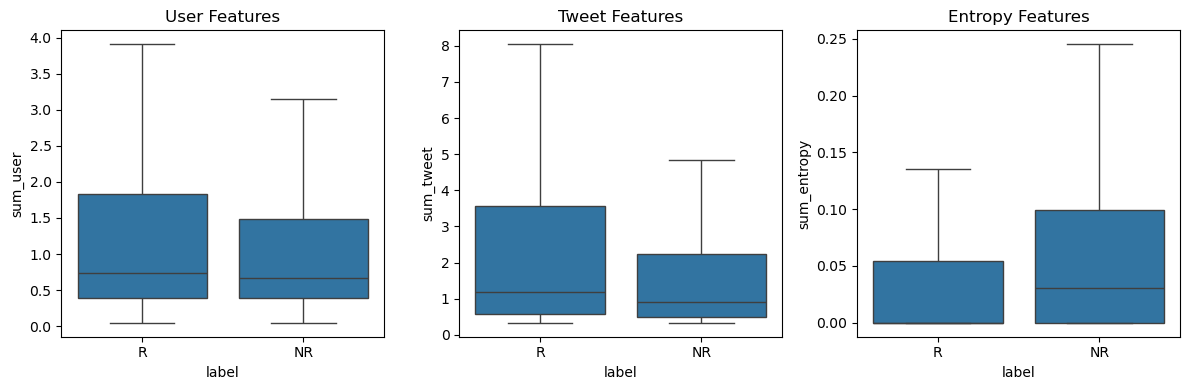

In [6]:
# Sum the 'user' features
data['sum_user'] = data.filter(regex='^user_').sum(axis=1)

# Sum the 'tweet' features
data['sum_tweet'] = data.filter(regex='^tw_').sum(axis=1)

# Sum the 'entropy' features
data['sum_entropy'] = data.filter(regex='^entropy_').sum(axis=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='sum_user', data=data, showfliers=False)
plt.title('User Features')
plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='sum_tweet', data=data,  showfliers=False)
plt.title('Tweet Features')
plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='sum_entropy', data=data,  showfliers=False)
plt.title('Entropy Features')
plt.tight_layout()




# 3.2 Clustering (30 pts in total)

## 3.2.1 Exercise with k-means

In [7]:
import os
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from scipy.stats import mode
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np
import random

#### 3.2.1.1 Using the original records to do the K-means

c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known 

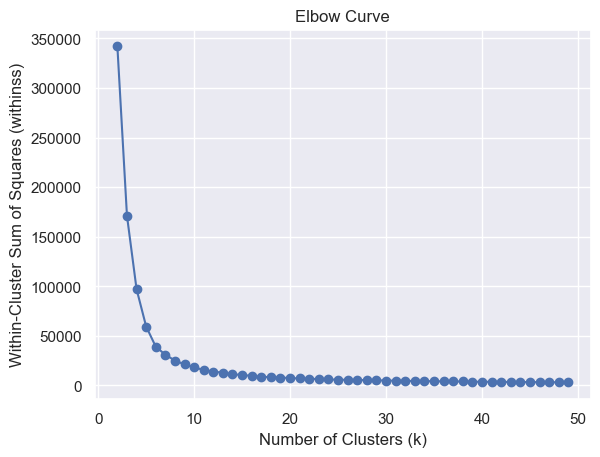

In [8]:
# random_seed = 42

# np.random.seed(random_seed)
# random.seed(random_seed)


# Prepare the feature set for clustering, excluding non-numeric columns if necessary
X = data.drop(columns=['id', 'parcel_name', 'label'])

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# List of k values
k_values = range(2, 50)

# List of withinss values
withinss_values = []

# Calculate withinss for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    withinss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, withinss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (withinss)')
plt.title('Elbow Curve')
plt.show()


best_k = 10

In [37]:
best_k = 20

In [38]:
# Assuming we have the true labels in the 'label' column
true_labels = data['label']
# Create an instance of KMeans with k=10
kmeans = KMeans(n_clusters= best_k)
# Fit the KMeans model to the standardized data
kmeans.fit(X)

# Predict the cluster labels for the data
predicted_labels = kmeans.predict(X)

# Map predicted cluster labels to true labels using the known labels in the dataset
label_mapping = {}
for cluster_id in set(predicted_labels):
    # Find the indices of rows in this cluster
    cluster_indices = (predicted_labels == cluster_id)
    # Get the true labels of those rows
    real_labels = data.loc[cluster_indices, 'label']
    # Find the most common true label in this cluster
    most_common_label = mode(real_labels).mode[0]
    # Map the cluster_id to the most common true label
    label_mapping[cluster_id] = most_common_label

# Now we have a mapping from cluster ID to the true label
# Apply this mapping to get the true labels for the entire dataset
mapped_predicted_labels = [label_mapping[label] for label in predicted_labels]
result = pd.Series(predicted_labels).map(label_mapping)
conf_matrix = confusion_matrix(data['label'], mapped_predicted_labels)
class_report = classification_report(data['label'], mapped_predicted_labels)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Confusion Matrix:
 [[800 423]
 [683 614]]
Classification Report:
               precision    recall  f1-score   support

          NR       0.54      0.65      0.59      1223
           R       0.59      0.47      0.53      1297

    accuracy                           0.56      2520
   macro avg       0.57      0.56      0.56      2520
weighted avg       0.57      0.56      0.56      2520



C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\2344172656.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_label = mode(real_labels).mode[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\2344172656.py:19: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  most_common_label = mode(real_labels).mode[0]


#### 3.2.1.2 PAC

In [42]:
from sklearn.decomposition import PCA

# Assuming X is already defined and contains the feature set without the label column

# Apply PCA to reduce the dimensionality of the data while retaining 90% variance
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X)
print(f"Original shape: {X.shape}, PCA shape: {X_pca.shape}")

# Check how many components PCA chose
num_components = pca.n_components_

# Now, apply k-means clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters= best_k, random_state=42)
kmeans_pca.fit(X_pca)
predicted_labels_pca = kmeans_pca.predict(X_pca)

# Create the mapping from predicted cluster labels to actual labels
label_mapping_pca = {}
for cluster_id in np.unique(predicted_labels_pca):
    cluster_indices = (predicted_labels_pca == cluster_id)
    if cluster_indices.any():  # Ensure there's at least one point in the cluster
        real_labels = data.loc[cluster_indices, 'label']
        if not real_labels.empty:
            most_common_label = mode(real_labels).mode[0]
            label_mapping_pca[cluster_id] = most_common_label
        else:
            label_mapping_pca[cluster_id] = 'Unknown'
            print(f"No real labels in cluster {cluster_id}")

# Handle any unexpected cluster labels by defaulting to 'Unknown'
mapped_predicted_labels = [label_mapping_pca.get(label, 'Unknown') for label in predicted_labels_pca]

result = pd.Series(label_mapping_pca).map(label_mapping)
conf_matrix = confusion_matrix(data['label'], mapped_predicted_labels)
class_report = classification_report(data['label'], mapped_predicted_labels)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Original shape: (2520, 507), PCA shape: (2520, 1)


c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\spatial\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Confusion Matrix:
 [[719 504]
 [639 658]]
Classification Report:
               precision    recall  f1-score   support

          NR       0.53      0.59      0.56      1223
           R       0.57      0.51      0.54      1297

    accuracy                           0.55      2520
   macro avg       0.55      0.55      0.55      2520
weighted avg       0.55      0.55      0.55      2520



C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\149745561.py:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_label = mode(real_labels).mode[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\149745561.py:25: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  most_common_label = mode(real_labels).mode[0]


In [40]:
from sklearn.decomposition import PCA
import numpy as np

# Example: Create a synthetic dataset with 5 features
np.random.seed(0)
X_synthetic = np.random.rand(100, 5) * np.array([1, 2, 3, 4, 5]) + np.array([1, 0, 1, 0, 1])

# Initialize PCA to keep enough components to explain 90% of the variance
pca = PCA(n_components=0.90)

# Fit PCA on the synthetic dataset
pca.fit(X_synthetic)

# Transform the dataset
X_pca = pca.transform(X_synthetic)

# Print out the results
print("Original number of features:", X_synthetic.shape[1])
print("Reduced number of features:", X_pca.shape[1])


Original number of features: 5
Reduced number of features: 3
